<h1>K-Means Clustering</h1>

This is an example to how use K-Means Clustering in Python. 
In this example, was employed the Iris Dataset (multiclass).
The example is based in the content from the link bellow. 
Reading these articles is important to understand how the algorithm works.

- https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
- https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset
- https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/
- https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

<h5>Importing Packages</h5>

In [47]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

<h5>Importing Dataset</h5>

In [48]:
# Load iris dataset from sklearn
iris = datasets.load_iris()

# Input values
x = iris['data']

# Output values
y = iris['target']

<h5>Processing</h5>

Elbow method

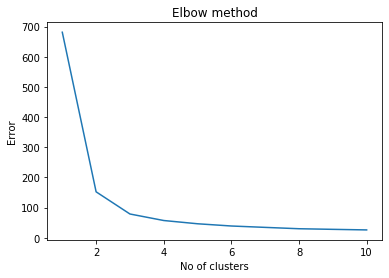

In [49]:
# Elbow method - optimal number of clusters

Error =[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [50]:
# optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3
kmeans = KMeans(n_clusters=3)

<h5>Training and Tests</h5>

In [51]:
# Fit the model with training data
y_pred = kmeans.fit_predict(x)

<h5>Evalutation Metrics</h5>

Text(0.5, 1.0, 'Predicted')

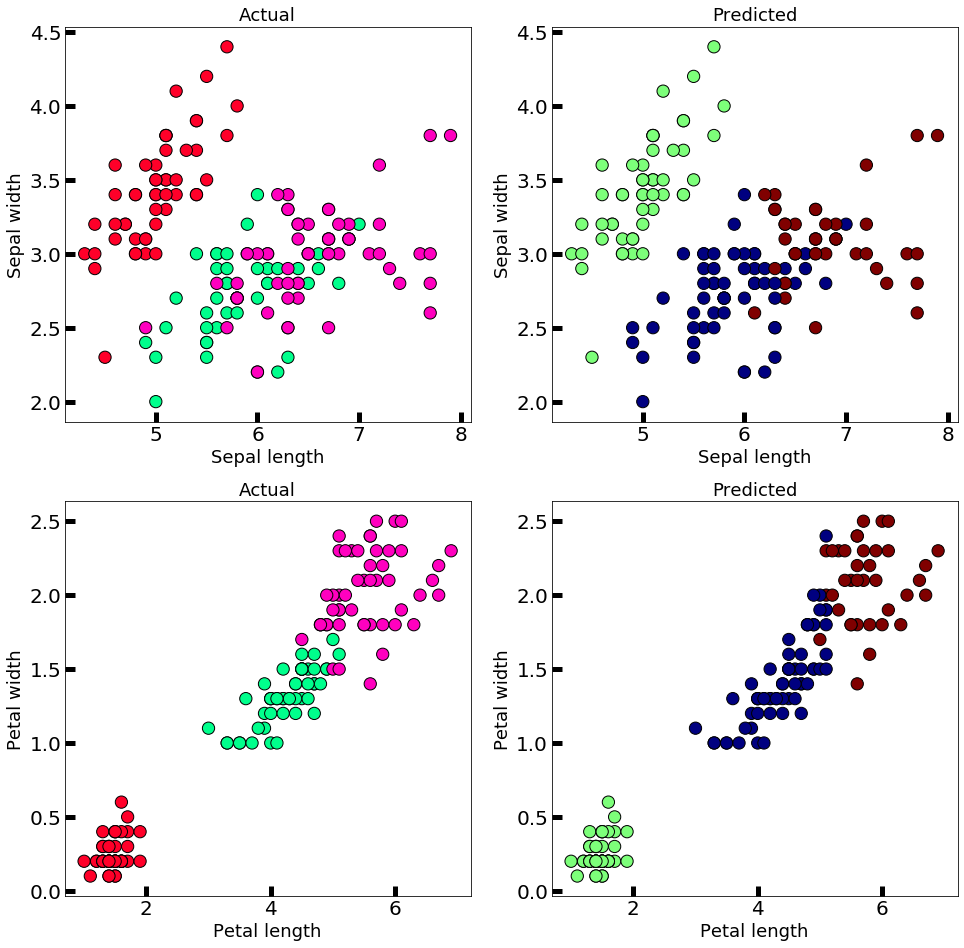

In [59]:
# This will tell us to which cluster does the data observations belong.
new_labels = kmeans.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(2, 2, figsize=(16,16))

axes[0][0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0][1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[0][0].set_xlabel('Sepal length', fontsize=18)
axes[0][0].set_ylabel('Sepal width', fontsize=18)
axes[0][1].set_xlabel('Sepal length', fontsize=18)
axes[0][1].set_ylabel('Sepal width', fontsize=18)
axes[0][0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0][1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0][0].set_title('Actual', fontsize=18)
axes[0][1].set_title('Predicted', fontsize=18)

axes[1][0].scatter(x[:, 2], x[:, 3], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1][1].scatter(x[:, 2], x[:, 3], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[1][0].set_xlabel('Petal length', fontsize=18)
axes[1][0].set_ylabel('Petal width', fontsize=18)
axes[1][1].set_xlabel('Petal length', fontsize=18)
axes[1][1].set_ylabel('Petal width', fontsize=18)
axes[1][0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1][1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1][0].set_title('Actual', fontsize=18)
axes[1][1].set_title('Predicted', fontsize=18)